In [1]:
import sys
sys.path.append('../scripts/')
from mcl_edit import *

<IPython.core.display.Javascript object>


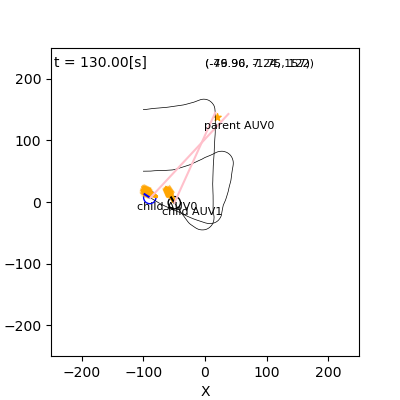

In [7]:
time_interval = 0.1
world = World(130, time_interval, debug = False)

m = Map()
data1 = [[3.0,0,25],[1.0, -20.0 * math.pi / 180, 5.5],[7.0,0,30],[0, -20.0 * math.pi / 180, 5.5],[7.0,0,30],[1.0, -20.0 * math.pi / 180, 5.5],[7.0,0,30],]
agent1 = AgentY(0.1,data1)
initial_pose_1 = np.array([0,100,0]).T
m.append_object(Landmark(initial_pose_1, agent = agent1))
world.append(m)    

m1 = Map()
initial_pose_2 = np.array([-100,50,0]).T
initial_pose_3 = np.array([-100,150,0]).T
accelerate_rate = 5
distance_minimum = 150
distance_maximum = 175
estimator2 = Mcl(m,initial_pose_2,100, accelerate_rate,distance_minimum, distance_maximum)
estimator3 = Mcl(m,initial_pose_3,100, accelerate_rate,distance_minimum, distance_maximum)
c= EstimationAgent(time_interval,2,0,accelerate_rate,distance_minimum, distance_maximum, estimator3)
b = EstimationAgent(time_interval,2,0,accelerate_rate,distance_minimum, distance_maximum, estimator2)
r_2 = Robot(initial_pose_2 , sensor = Camera(m),agent = b, color = "blue")
r_1 = Robot(initial_pose_3,sensor = Camera(m), agent = c)
m1.append_object(r_2)
m1.append_object(r_1)
world.append(m1)
world.draw()

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(estimator2.sigma_xs,color = "k",label = "x_std")
plt.plot(estimator2.sigma_ys, color = "r", label = "y_std")
ax.set_xlabel("time[s]")
ax.set_ylim([0.0,30])
ax.set_xlim([0.0,1300])
ax.set_ylabel("standard deviation(std)[m]")
ax.set_xticklabels(["0", "20", "40", "60", "80", "100", "120"])
fig.legend()
plt.show()

/tmp/ipykernel_7345/1972691264.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "20", "40", "60", "80", "100", "120"])


<IPython.core.display.Javascript object>

In [5]:
    def shift_transition(self, nu, omega, time):
        t0 = self.pose[2]
        if math.fabs(omega) < 1e-10:
            return self.pose + np.array( [nu*math.cos(t0)+2.0,
                                     nu*math.sin(t0),
                                     omega ] ) / math.sqrt((nu*math.cos(t0)+2.0)**2 +(nu*math.sin(t0))**2) * math.sqrt((nu*math.cos(t0))**2 +(nu*math.sin(t0))**2) * time
        else:
            return self.pose + np.array( [nu/omega*(math.sin(t0 + omega*time)- math.sin(t0))+2.0,nu/omega*(-math.cos(t0 + omega*time) + math.cos(t0)),                                    omega*time ] )
        / math.sqrt((nu/omega*(math.sin(t0 + omega*time) - math.sin(t0))+2.0)**2 + (nu/omega*(-math.cos(t0 + omega*time) + math.cos(t0))**2 ))  * math.sqrt((nu/omega*(math.sin(t0 + omega*time) - math.sin(t0)))**2 + (nu/omega*(-math.cos(t0 + omega*time) + math.cos(t0))**2 ))

SyntaxError: invalid syntax (1287180781.py, line 9)

In [6]:
           print(self.pose + np.array([obs[0][0][0] * math.cos(obs[0][0][1]), obs[0][0][0] * math.sin(obs[0][0][1]),0]))

NameError: name 'self' is not defined

<IPython.core.display.Javascript object>


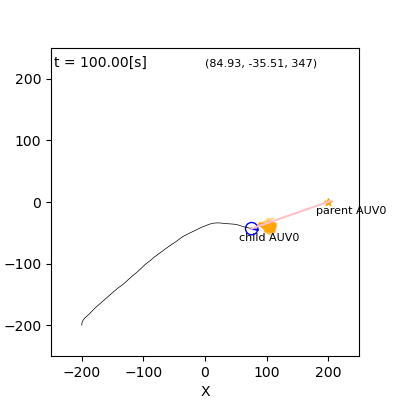

In [4]:
import matplotlib.pyplot as plt
time_interval = 0.1
world = World(100, time_interval, debug = False)

m = Map()
straight = Agent(2.0,0)
initial_pose_1 = np.array([0,0,0]).T
#initial_pose_3 = np.array([-200,-200,math.pi]).T
#initial_pose_4 = np.array([200,-200,math.pi / 2]).T
m.append_object(Landmark(initial_pose_1, agent = straight))
#m.append_landmark(Landmark(initial_pose_3, agent = straight))
#m.append_landmark(Landmark(initial_pose_4, agent = straight))
world.append(m)    

accelerate_rate = 5
distance_minimum = 150
distance_maximum = 175

initial_pose_2 = np.array([-200,-200,math.pi / 2 ]).T
estimator2 = Mcl(m,initial_pose_2,100, accelerate_rate,distance_minimum, distance_maximum)
b= EstimationAgent(time_interval,2,0,accelerate_rate,distance_minimum, distance_maximum, estimator2)
r_2 = Robot(initial_pose_2 , sensor = Camera(m),agent = b, color = "blue")
world.append(r_2)
#r_3 = IdealRobot(initial_pose_2, sensor=IdealCamera(m), agent=straight, color="red") 
#world.append(r_3)
world.draw()

<IPython.core.display.Javascript object>


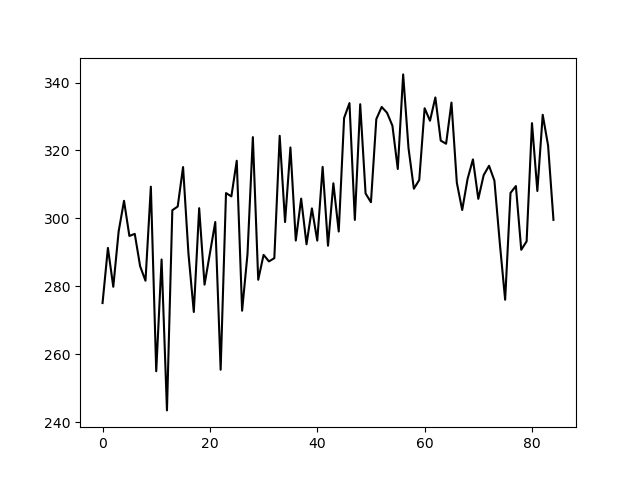

In [30]:
distance_stuck = np.zeros(len(r_2.sensor_stuck))
for i in range(len(r_2.sensor_stuck)):
    distance_stuck[i] = r_2.sensor_stuck[i][0][0][0]
    
plt.plot(distance_stuck,color = "k")
plt.show()